Лабораторна робота № 3
Смислов Даніл
ІП-01

Спочатку імпортуємо потрібні для роботи бібліотеки

In [1]:
from dataclasses import replace
import pandas as pd 
import matplotlib.pyplot as plt

Далі імпортуємо дані з файлу Data2.csv з кодуванням 'cp1252' та розділювачем ';'. Розглянемо структуру датафрейму.

In [2]:
def getDataset():
    data = pd.read_csv('Data2.csv',sep=';',encoding='cp1252')
    return data 

dataset = getDataset()
dataset.info()
dataset.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    object 
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    object 
 5   Area            217 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.3+ KB


,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,"561,7787463",34656032.0,"9809,225",652860
1,Albania,Europe & Central Asia,"4124,98239",2876101.0,"5716,853",28750
2,Algeria,Middle East & North Africa,"3916,881571",40606052.0,"145400,217",2381740
3,American Samoa,East Asia & Pacific,"11834,74523",55599.0,NaN,200
4,Andorra,Europe & Central Asia,"36988,62203",77281.0,"462,042",470


Бачимо, що проблема з типами даних. Напишемо функцію, що конвертує в тип float та заміняє ',' на '.'. Застосуємо до стовпців, перевіримо типи. 

In [3]:
def toFloat(dataset,columnName):
    dataset[columnName] = dataset[columnName].str.replace(',', '.').astype(float)

toFloat(dataset,'GDP per capita')
toFloat(dataset,'CO2 emission')
toFloat(dataset,'Area')
dataset.dtypes



Country Name       object
Region             object
GDP per capita    float64
Populatiion       float64
CO2 emission      float64
Area              float64
dtype: object

Окей, з типами проблему вирішили. Далі я помітив проблему з очевидно некоректними від'ємними даними в певних стовпцях. Давайте напишемо процедуру та замінимо від'ємні значення на абсолютні. Також для перевірки виведемо чи залишились в нас від'ємні значення. 

In [4]:
def replaceNeg(dataset,columnName):
    dataset[columnName] = abs(dataset[columnName])

replaceNeg(dataset,'Area')
replaceNeg(dataset,'GDP per capita')

print(dataset[dataset['Area']<0])
print(dataset[dataset['GDP per capita']<0])

Empty DataFrame
Columns: [Country Name, Region, GDP per capita, Populatiion, CO2 emission, Area]
Index: []
Empty DataFrame
Columns: [Country Name, Region, GDP per capita, Populatiion, CO2 emission, Area]
Index: []


Також помітив, що є NULL значення. Давайте замінимо їх на середні значення, як це було зазначено в додатковому завданні. Перевіримо вигляд даних тепер.

In [5]:
def replaceNull(dataset,columnName):
    mean = dataset[columnName].mean()
    dataset[columnName].fillna(mean,inplace = True)
replaceNull(dataset,'CO2 emission')
replaceNull(dataset,'GDP per capita')
replaceNull(dataset,'Populatiion')
dataset.head(10)

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0
5,Angola,Sub-Saharan Africa,3308.700233,28813463.0,34763.160000,1246700.0
6,Antigua and Barbuda,Latin America & Caribbean,14462.176280,100963.0,531.715000,440.0
7,Argentina,Latin America & Caribbean,12440.320980,43847430.0,204024.546000,2780400.0
8,Armenia,Europe & Central Asia,3614.688357,2924816.0,5529.836000,29740.0
9,Aruba,Latin America & Caribbean,13445.593416,104822.0,872.746000,180.0


Тепер давайте зобразимо діаграми розмаху для всіх наших числових стовпців.

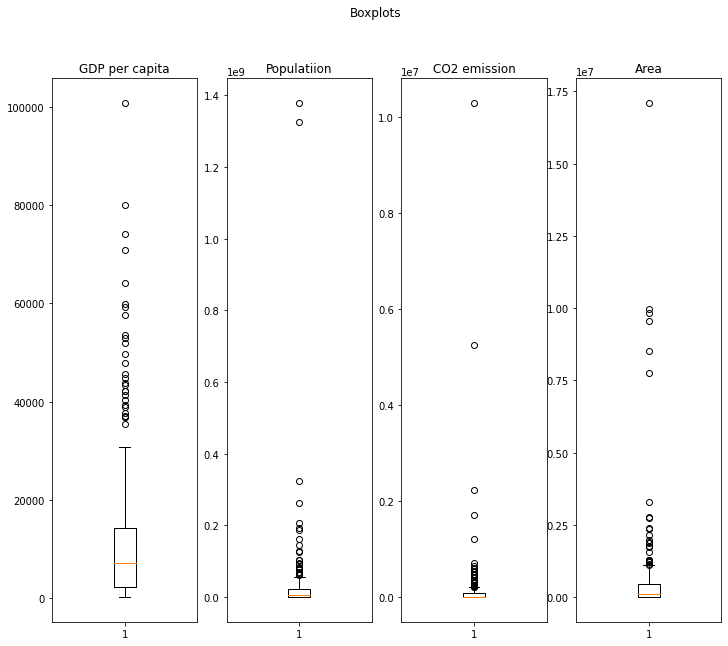

In [6]:
def multipleBoxplot(dataset):
    fig, [ax1,ax2,ax3,ax4] = plt.subplots(1,4,figsize=(12,10))
    
    fig.suptitle('Boxplots')
    ax1.set_title('GDP per capita')
    ax1.boxplot(dataset['GDP per capita'])
    ax2.set_title('Populatiion')
    ax2.boxplot(dataset['Populatiion'])
    ax3.set_title('CO2 emission')
    ax3.boxplot(dataset['CO2 emission'])
    ax4.set_title('Area')  
    ax4.boxplot(dataset['Area'])

multipleBoxplot(dataset)

Побудуємо гістограми для всіх наших числових стовпців.

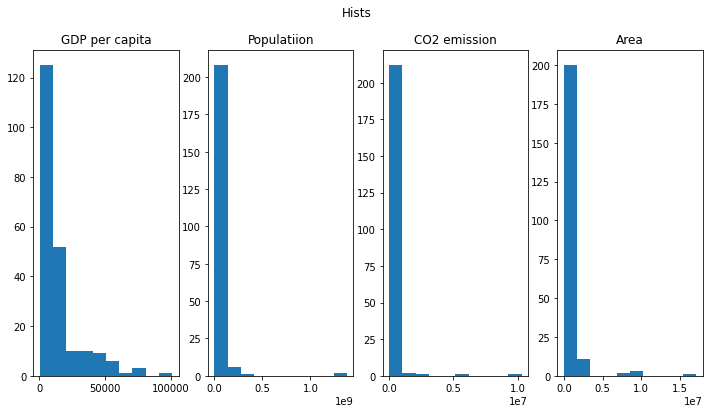

In [7]:
def multipleHist(dataset):
    fig, [ax1,ax2,ax3,ax4] = plt.subplots(1,4,figsize=(12,6))
    
    fig.suptitle('Hists')
    ax1.set_title('GDP per capita')
    ax1.hist(dataset['GDP per capita'])
    ax2.set_title('Populatiion')
    ax2.hist(dataset['Populatiion'])
    ax3.set_title('CO2 emission')
    ax3.hist(dataset['CO2 emission'])
    ax4.set_title('Area')  
    ax4.hist(dataset['Area'])
multipleHist(dataset)

Додамо стовпчик з даними про щільність населення.

In [8]:
def addPopulationDensity(dataset):
    dataset['Population Density'] = dataset['Populatiion'] / dataset["Area"]
addPopulationDensity(dataset)

dataset.head(5)

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area,Population Density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0,164.427660


Приступимо до виконання додаткового завдання. Пусті значення ми вже замінили середніми. Тепер давайте знайдемо країну(або країни, якщо їх декілька з однаковим) з максимальним ВВП на душу населення.

In [9]:
print('The biggest GDP per capita:')
print(dataset[dataset['GDP per capita'] == dataset['GDP per capita'].max()]['Country Name'].to_string())


The biggest GDP per capita:
115    Luxembourg


Виведемо країну з найменшою площею.

In [10]:
print('The smallest area size:')
print(dataset[dataset['Area'] == dataset['Area'].min()]['Country Name'].to_string())


The smallest area size:
130    Monaco


Знайдемо регіон з найбільшою середньою площею країн в ньому.

In [11]:
def findMaxAverageAreaRegion(dataset):
    maxAverageArea = dataset.groupby('Region').mean()['Area'].idxmax()
    print(maxAverageArea)

print('Max AVG area region: ')
findMaxAverageAreaRegion(dataset)

Max AVG area region: 
North America


Знайдемо країну з найбільшим населенням в світі.

In [12]:
def maxPopulationWorld(dataset):
    print(dataset[dataset['Populatiion'] == dataset['Populatiion'].max()]['Country Name'].to_string())

print('The most populated country in world:')
maxPopulationWorld(dataset)

The most populated country in world:
41    China


Знайдемо країну з найбільшим населенням в Європі.

In [13]:
def maxPopulationEurope(dataset):
    subset = dataset[dataset['Region'] == 'Europe & Central Asia']
    print(subset[subset['Populatiion'] == subset['Populatiion'].max()]['Country Name'].to_string())

print('The most populated country in Europe:')
maxPopulationEurope(dataset)

The most populated country in Europe:
160    Russian Federation


Знайдемо чи свівпадає в якомусь регіоні середнє та медіана ВВП на душу населення. Виведемо медіани, середні та спільне. Як бачимо, не співпадає.

In [14]:
def checkMatchMeanAndMedian(dataset):
    mean = dataset.groupby('Region').mean()['GDP per capita']
    median = dataset.groupby('Region').median()['GDP per capita']
    print('Mean: ')
    print(mean)
    print('Median: ')
    print(median)
    print(pd.merge(mean,median,how = 'inner').any())
checkMatchMeanAndMedian(dataset)

Mean: 
Region
East Asia & Pacific           15130.226548
Europe & Central Asia         22742.135518
Latin America & Caribbean     10485.343136
Middle East & North Africa    15459.162533
North America                 37755.682535
South Asia                     2795.213935
Sub-Saharan Africa             2878.665521
Name: GDP per capita, dtype: float64
Median: 
Region
East Asia & Pacific            5910.620932
Europe & Central Asia         13445.593416
Latin America & Caribbean     10833.201075
Middle East & North Africa    13445.593416
North America                 42183.295100
South Asia                     1576.608412
Sub-Saharan Africa             1034.390361
Name: GDP per capita, dtype: float64
GDP per capita    False
dtype: bool


Виведемо 5 країн з найбільшим та 5 з найменшим ВВП на душу населення. Як бачимо, країни з найменшим - переважно країни Африки. З найбільшим - Європи.

In [15]:
def topAndBottomGDP(dataset):
    sortedByGRP = dataset.sort_values(by='GDP per capita', ascending = False)
    print('Top 5 by GDP per capita:')
    print(sortedByGRP.head(5))
    print('Bottom 5 by GDP per capita:')
    print(sortedByGRP.tail(5))
topAndBottomGDP(dataset)

Top 5 by GDP per capita:
         Country Name                 Region  GDP per capita  Populatiion  \
115        Luxembourg  Europe & Central Asia    100738.68420     582972.0   
188       Switzerland  Europe & Central Asia     79887.51824    8372098.0   
116  Macao SAR, China    East Asia & Pacific     74017.18471     612167.0   
146            Norway  Europe & Central Asia     70868.12250    5232929.0   
92            Ireland  Europe & Central Asia     64175.43824    4773095.0   

     CO2 emission      Area  Population Density  
115      9658.878    2590.0          225.085714  
188     35305.876   41290.0          202.763333  
116      1283.450      30.3        20203.531353  
146     47626.996  385178.0           13.585742  
92      34066.430   70280.0           67.915410  
Bottom 5 by GDP per capita:
                 Country Name              Region  GDP per capita  \
118                Madagascar  Sub-Saharan Africa      401.742270   
37   Central African Republic  Sub-Saharan Afr

Додамо стовпчик з забрудненням вуглекислим газом на душу населення. Виведемо 5 країн з найбільшим та 5 з найменшим значенням цього показника. Найменший цей показник у країн Африки, адже, скоріш за все, порівняно мала кількість виробництв, транспорту та технологій, що можуть викидати CO2 в атмосферу.

In [16]:
def topAndBottomCO2PerCapita(dataset):
    #Add column with CO2 per capita
    dataset['CO2 per capita'] = dataset['CO2 emission'] / dataset['Populatiion']
    sortedByCO2PerCapita = dataset.sort_values(by = 'CO2 per capita', ascending = False)
    print('Top 5 by CO2 per capita')
    print(sortedByCO2PerCapita.head(5))
    print('Bottom 5 by CO2 per capita')
    print(sortedByCO2PerCapita.tail(5))
topAndBottomCO2PerCapita(dataset)


Top 5 by CO2 per capita
                 Country Name                     Region  GDP per capita  \
182  St. Martin (French part)  Latin America & Caribbean    13445.593416   
163                San Marino      Europe & Central Asia    47908.561410   
130                    Monaco      Europe & Central Asia    13445.593416   
145  Northern Mariana Islands        East Asia & Pacific    22572.378820   
3              American Samoa        East Asia & Pacific    11834.745230   

     Populatiion   CO2 emission   Area  Population Density  CO2 per capita  
182      31949.0  165114.116337   54.4          587.297794        5.168053  
163      33203.0  165114.116337   60.0          553.383333        4.972867  
130      38499.0  165114.116337    2.0        19249.500000        4.288790  
145      55023.0  165114.116337  460.0          119.615217        3.000820  
3        55599.0  165114.116337  200.0          277.995000        2.969732  
Bottom 5 by CO2 per capita
         Country Name         